# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.


Probabilities for R_min:
P(R_min = 1) = 0.3056
P(R_min = 2) = 0.2500
P(R_min = 3) = 0.1944
P(R_min = 4) = 0.1389
P(R_min = 5) = 0.0833
P(R_min = 6) = 0.0278
Expected value of R_min: 2.5278
Empirical probabilities for R_min:
P(R_min = 1) ≈ 0.3056
P(R_min = 2) ≈ 0.2443
P(R_min = 3) ≈ 0.1944
P(R_min = 4) ≈ 0.1424
P(R_min = 5) ≈ 0.0853
P(R_min = 6) ≈ 0.0280


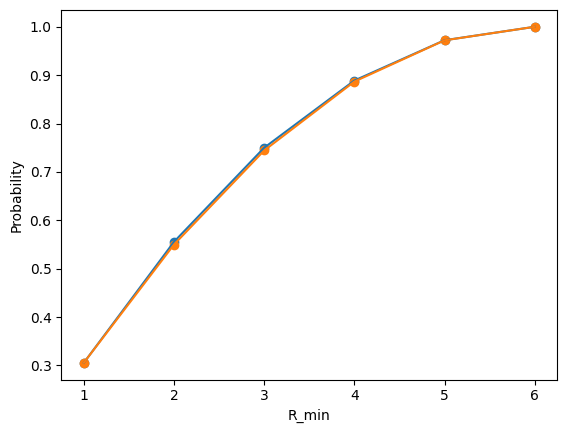

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

outcomes = []
for d1 in range(1, 7):
    for d2 in range(1, 7):
        outcomes.append(min(d1, d2))

unique_values, counts = np.unique(outcomes, return_counts=True)
probabilities = counts / len(outcomes)

probabilities_dict = dict(zip(unique_values, probabilities))
print("Probabilities for R_min:")
for value, prob in probabilities_dict.items():
    print(f"P(R_min = {value}) = {prob:.4f}")

expected_value = sum(value * prob for value, prob in probabilities_dict.items())
print(f"Expected value of R_min: {expected_value:.4f}")

num_simulations = 10000
simulated_min_values = [min(np.random.randint(1, 7), np.random.randint(1, 7)) for _ in range(num_simulations)]
simulated_counts = np.array([simulated_min_values.count(i) for i in range(1, 7)])
simulated_probabilities = simulated_counts / num_simulations

print("Empirical probabilities for R_min:")
for value, prob in enumerate(simulated_probabilities, 1):
    print(f"P(R_min = {value}) ≈ {prob:.4f}")

cdf = np.cumsum([probabilities_dict[i] for i in range(1, 7)])
ecdf = np.cumsum([simulated_probabilities[i-1] for i in range(1, 7)])
plt.plot(range(1, 7), cdf, label='cdf')
plt.scatter(range(1, 7), cdf, label='cdf')
plt.plot(range(1, 7), ecdf, label='ecdf')
plt.scatter(range(1, 7), ecdf, label='ecdf')
plt.xlabel('R_min')
plt.ylabel('Probability')
plt.show()


2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.


Expected value of R_med: 3.4808


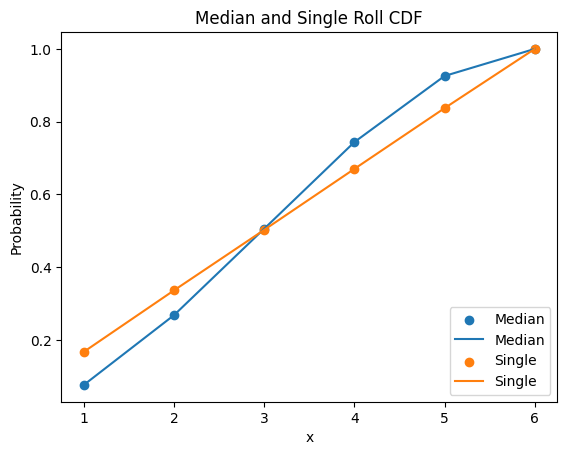

In [21]:
def simulate_rolls(num_simulations):
    results = []
    for _ in range(num_simulations):
        rolls = np.random.randint(1, 7, size=3)
        # Get the middle value 
        middle_value = np.median(rolls)
        results.append(middle_value)
    return results

num_simulations = 10000
simulated_med_values = simulate_rolls(num_simulations)

unique_values, counts = np.unique(simulated_med_values, return_counts=True)
simulated_probabilities = counts / num_simulations

expected_value = np.sum(unique_values * simulated_probabilities)
print(f"Expected value of R_med: {expected_value:.4f}")

ecdf = np.cumsum(simulated_probabilities)

single = np.zeros(6)
d1 = np.random.choice(range(1,7), size=num_simulations)
for i in range(6):
    single[i] = (1/num_simulations)*np.sum(d1 <= range(1,7)[i])

plt.scatter(range(1,7),ecdf,label='Median')
plt.plot(range(1,7),ecdf,label='Median')
plt.scatter(range(1,7),single,label='Single')
plt.plot(range(1,7),single,label='Single')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Median and Single Roll CDF')
plt.show()


3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

                  0
count  50000.000000
mean       4.197200
std        3.217546
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       35.000000


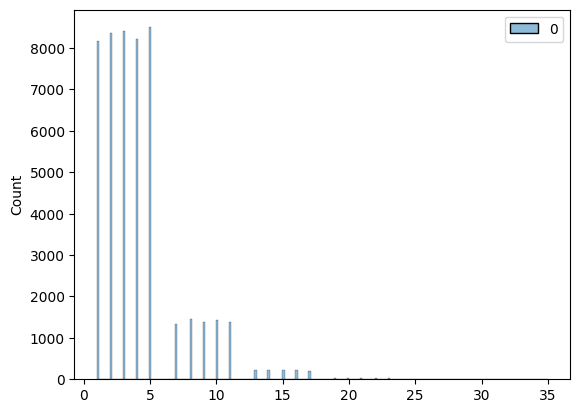

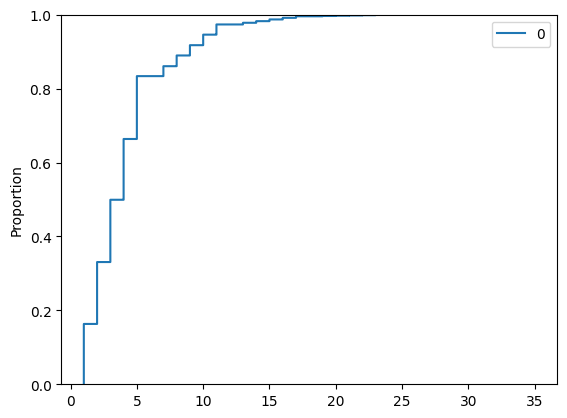

In [ ]:
num_simulations = 50000
results = []
for i in range(num_simulations):
    total = 0
    roll = 6
    while roll == 6:
        roll = np.random.choice(range(1,7), size=1)
        total += roll
    
    results.append(int(total[0]))

results = pd.DataFrame(results)
print(results.describe())

sns.histplot(results)
plt.show()
sns.ecdfplot(results)
plt.show()

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?


In [27]:
df = pd.read_csv('./data/mammogram.csv')

print(pd.crosstab( df['treatment'], df['breast_cancer_death']))

diffence = (44425 / (44425+500)) - (44405 / (44405+505))
print("diffence in survival rate control vs mammogram:", diffence)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500
diffence in survival rate control vs mammogram: 0.00011505110015985753


2. Bootstrap the densities and distributions of survival rates for the two groups.


control mean: 0.988760124693832 
mammogram_mean: 0.9888764874791319


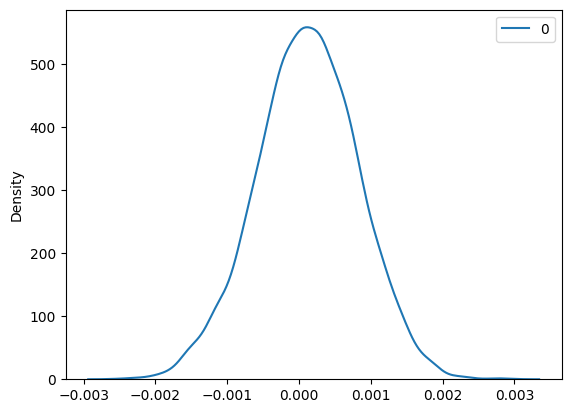

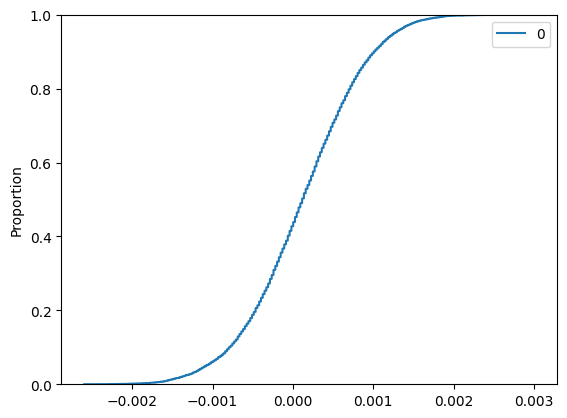

In [ ]:
def bootstrap_survival_rate(data, group, num_samples=10000):
    survival_rates = []
    group_data = data[data['treatment'] == group]

    for _ in range(num_samples):
        resample = group_data.sample(len(group_data), replace=True)
        survival_rate = (resample['breast_cancer_death'] == 'no').mean()
        survival_rates.append(survival_rate)
    
    return np.array(survival_rates)

control_survival_rates = bootstrap_survival_rate(df, 'control')
mammogram_survival_rates = bootstrap_survival_rate(df, 'mammogram')
control_mean = np.mean(control_survival_rates)
mammogram_mean = np.mean(mammogram_survival_rates)
print("control mean:", control_mean, "\nmammogram_mean:" ,mammogram_mean)

sns.kdeplot([mammogram_survival_rates - control_survival_rates])
plt.show()
sns.ecdfplot([mammogram_survival_rates - control_survival_rates])
plt.show()


3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?


In [38]:
level = .99
lower_bound = np.quantile([mammogram_survival_rates - control_survival_rates], .005 )
upper_bound = np.quantile([mammogram_survival_rates - control_survival_rates], .995)
print(f'Confidence interval 99%: ({lower_bound}, {upper_bound})')

Confidence interval 99%: (-0.001710459055748314, 0.001873842584073796)


> Yes, the confidence interval includes 0

4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

> The data might over/understate the conclusions reached because there isn't enough information provided from just the dataset. Other informaton like patients' age, pre-existing conditions, cancer stage, etc. could add contribute to the results. Other factors like socioeconomic status and access to care can also confound the results. Additionally, there could be selection bias because there isn't information given on how the treatment groups were assigned. Data that includes these factors mentioned could aid in understanding/criticizing the results.